# Medical Cost Personal Insurance (Project -3)

Problem Statement:-
    Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import pickle
import warnings
warnings.simplefilter("ignore")
import joblib

In [6]:
df = pd.read_csv("Medical_Insurance_Cost.csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no missing values 

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.shape

(1338, 7)

In [13]:
df.dtypes[df.dtypes=='object']

sex       object
smoker    object
region    object
dtype: object

In [14]:
df.dtypes[df.dtypes=='object'].index

Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
df[df.dtypes[df.dtypes=='object'].index].describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [16]:
for v in ['sex', 'children', 'smoker', 'region']:
    print(v," categories:\n",df[v].unique())

sex  categories:
 ['female' 'male']
children  categories:
 [0 1 3 2 5 4]
smoker  categories:
 ['yes' 'no']
region  categories:
 ['southwest' 'southeast' 'northwest' 'northeast']


In [18]:
 #number of duplicate rows

num_dup_rows = len(df) - len(df.drop_duplicates(keep="first"))

In [19]:
if num_dup_rows!= 0:
    print("Number of duplicate rows found : {}\n\nDuplicates removed!".format(num_dup_rows))
    df.drop_duplicates(keep="first",inplace=True)
else:
    print("No duplicate entries found!")

Number of duplicate rows found : 1

Duplicates removed!


# Exploratory Data Analysis

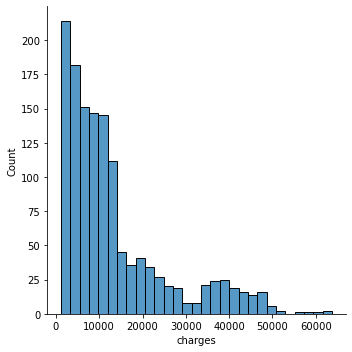

In [20]:
sns.displot(df['charges'])

In [21]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='charges'>

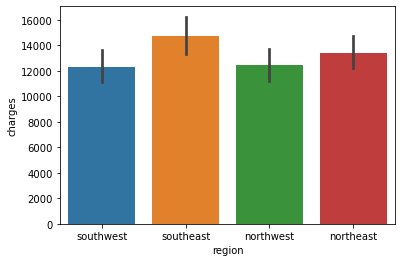

In [22]:
sns.barplot(y=df['charges'],x=df['region'])

<AxesSubplot:xlabel='smoker', ylabel='charges'>

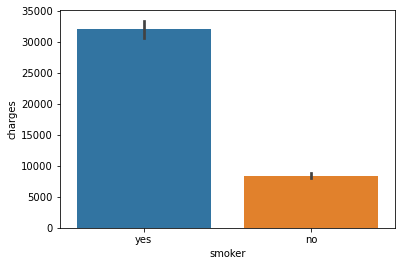

In [23]:
sns.barplot(y=df['charges'],x=df['smoker'])

<AxesSubplot:xlabel='children', ylabel='charges'>

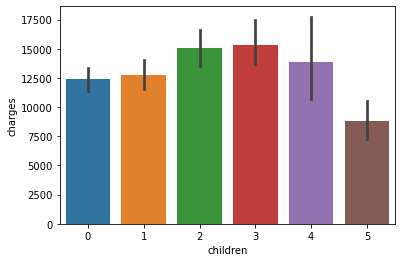

In [24]:
sns.barplot(y=df['charges'],x=df['children'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

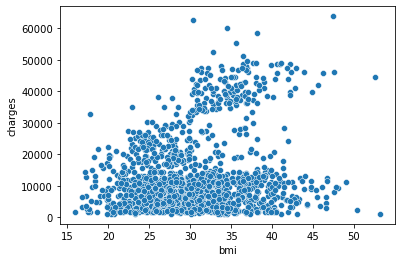

In [25]:
sns.scatterplot(y=df['charges'],x=df['bmi'])

<AxesSubplot:xlabel='age', ylabel='charges'>

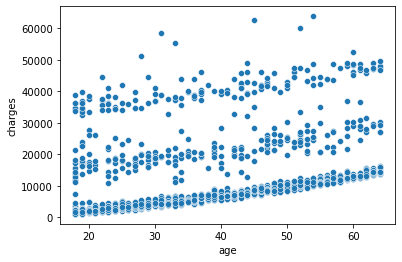

In [26]:
sns.scatterplot(y=df['charges'],x=df['age'])

<AxesSubplot:xlabel='sex', ylabel='charges'>

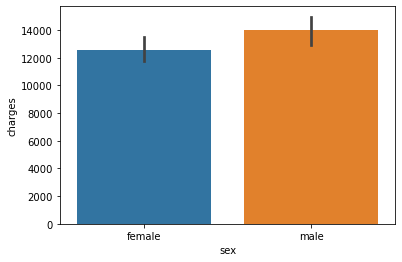

In [27]:
sns.barplot(y=df['charges'],x=df['sex'])

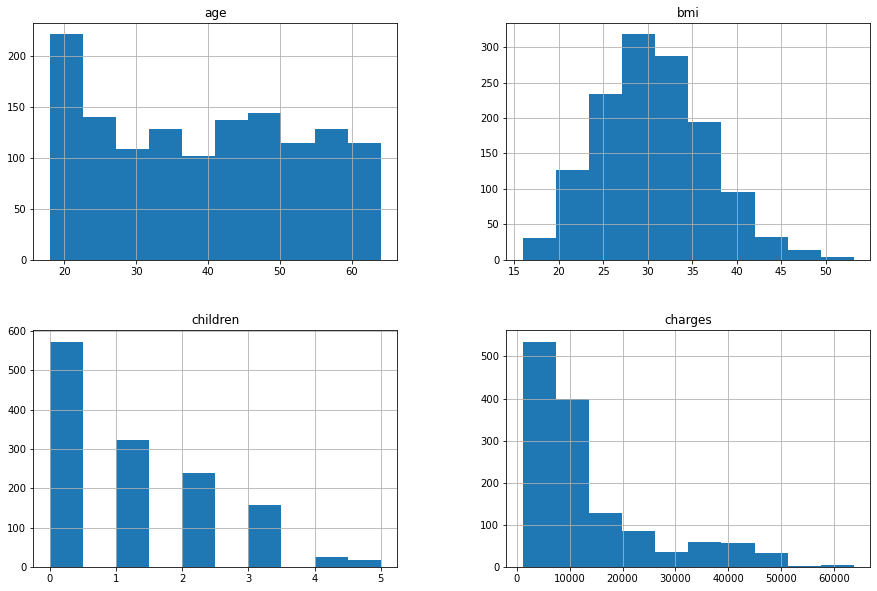

In [28]:
df.hist(figsize=(15,10))
plt.show()

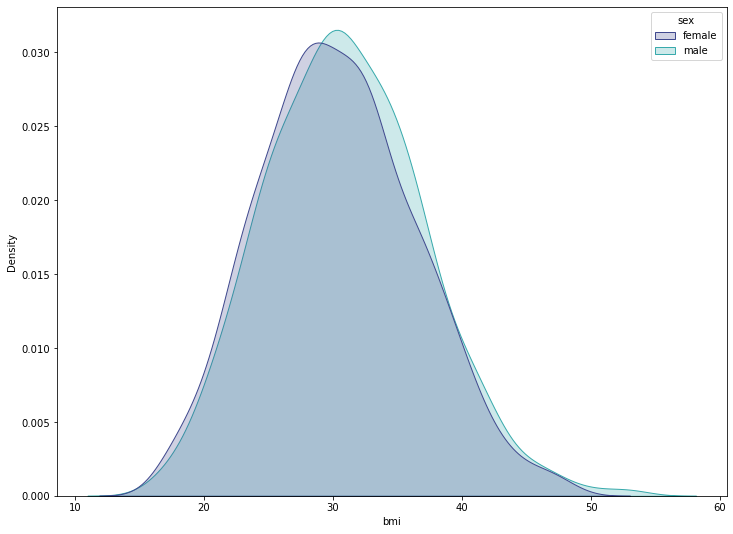

In [30]:
plt.figure(figsize=(12,9))
sns.kdeplot(data = df , x="bmi", hue="sex", shade=True, palette="mako")
plt.show()

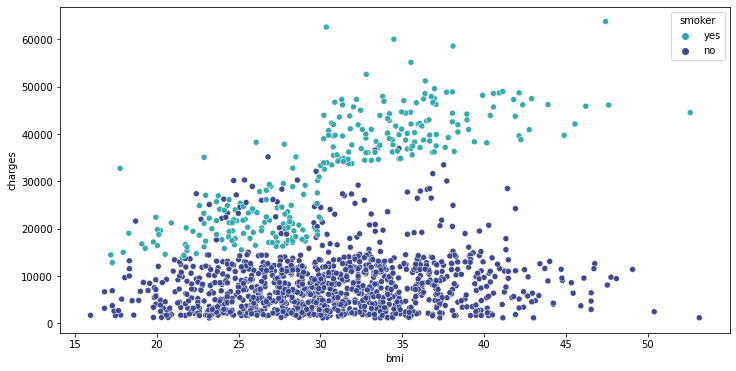

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker", palette="mako_r")
plt.show()

In [32]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [33]:
one_hot_encoding = df[['sex','smoker','region']]

In [34]:
df1 = pd.get_dummies(one_hot_encoding,drop_first=True)

In [35]:
df_new = pd.concat([df, df1],axis=1)
df_new.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [36]:
df_new.drop(one_hot_encoding,inplace=True,axis=1)


In [37]:
df_new.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


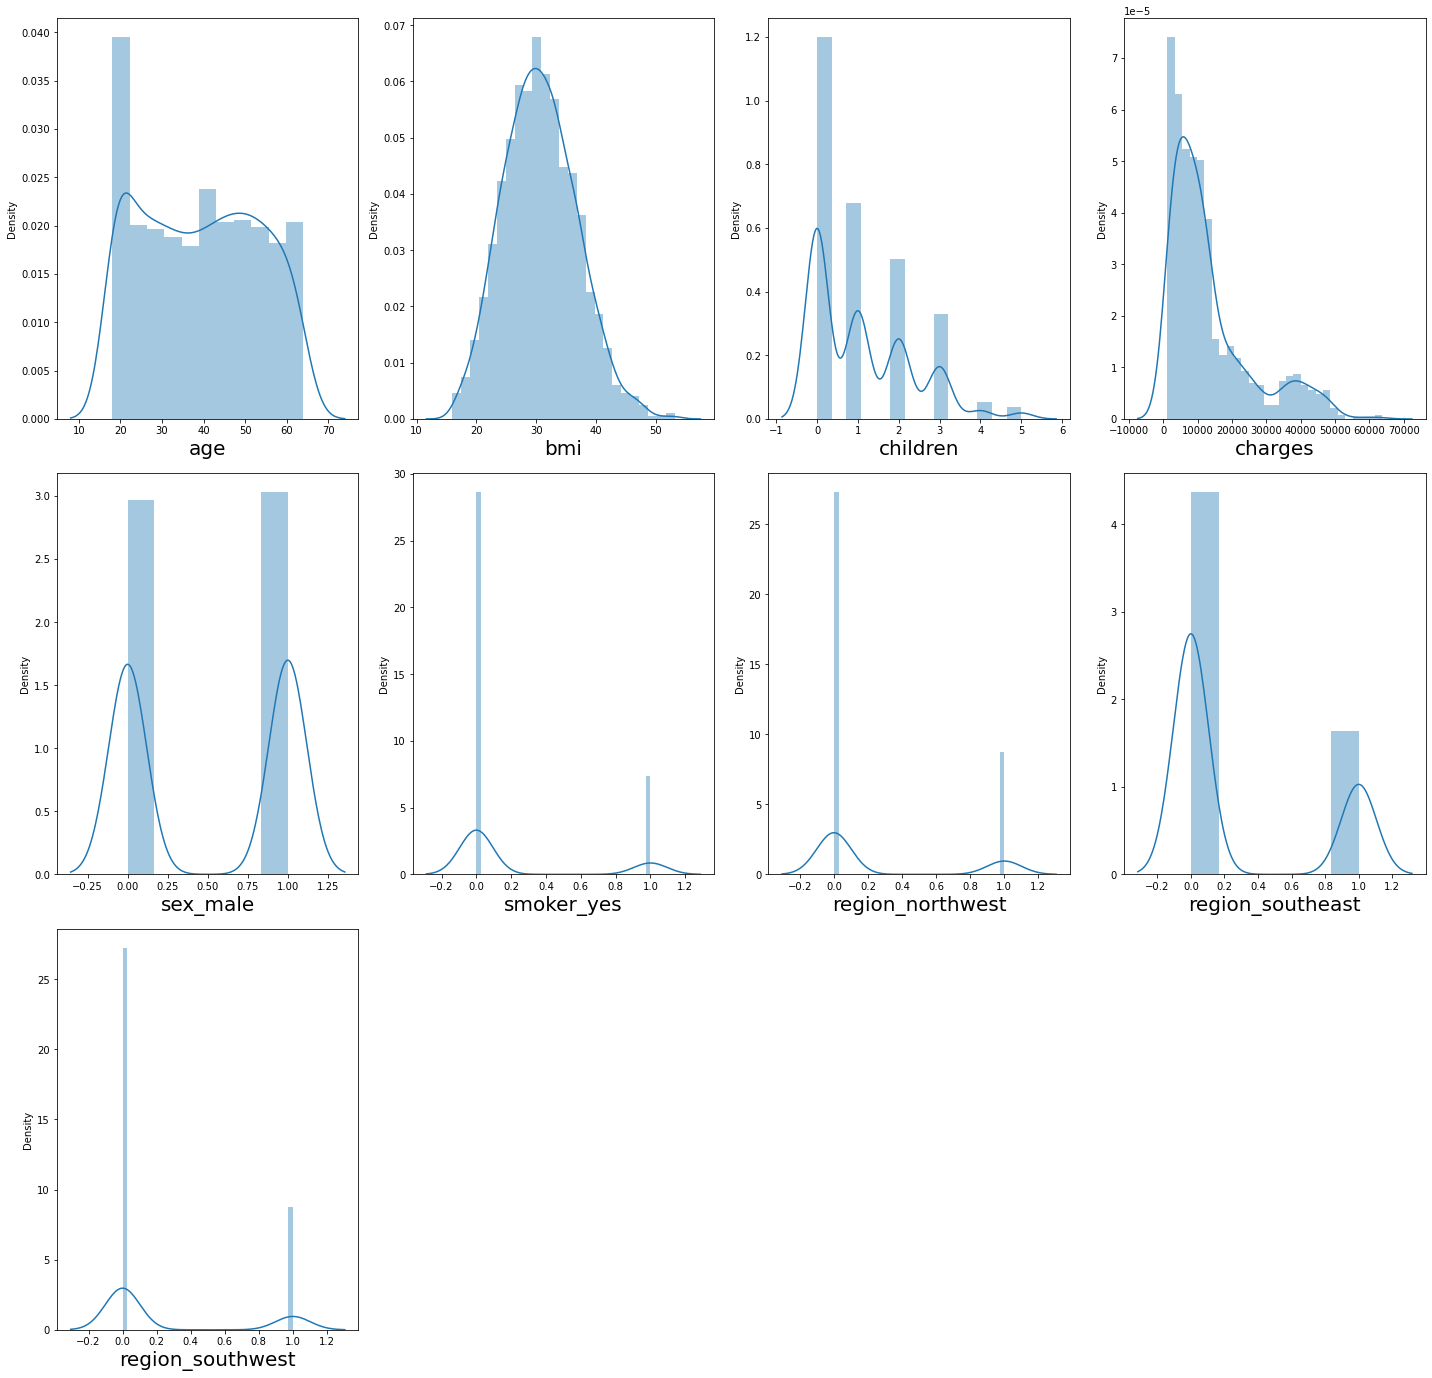

In [38]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [39]:
y = df_new['charges']
X =df_new.drop(columns = ['charges'])

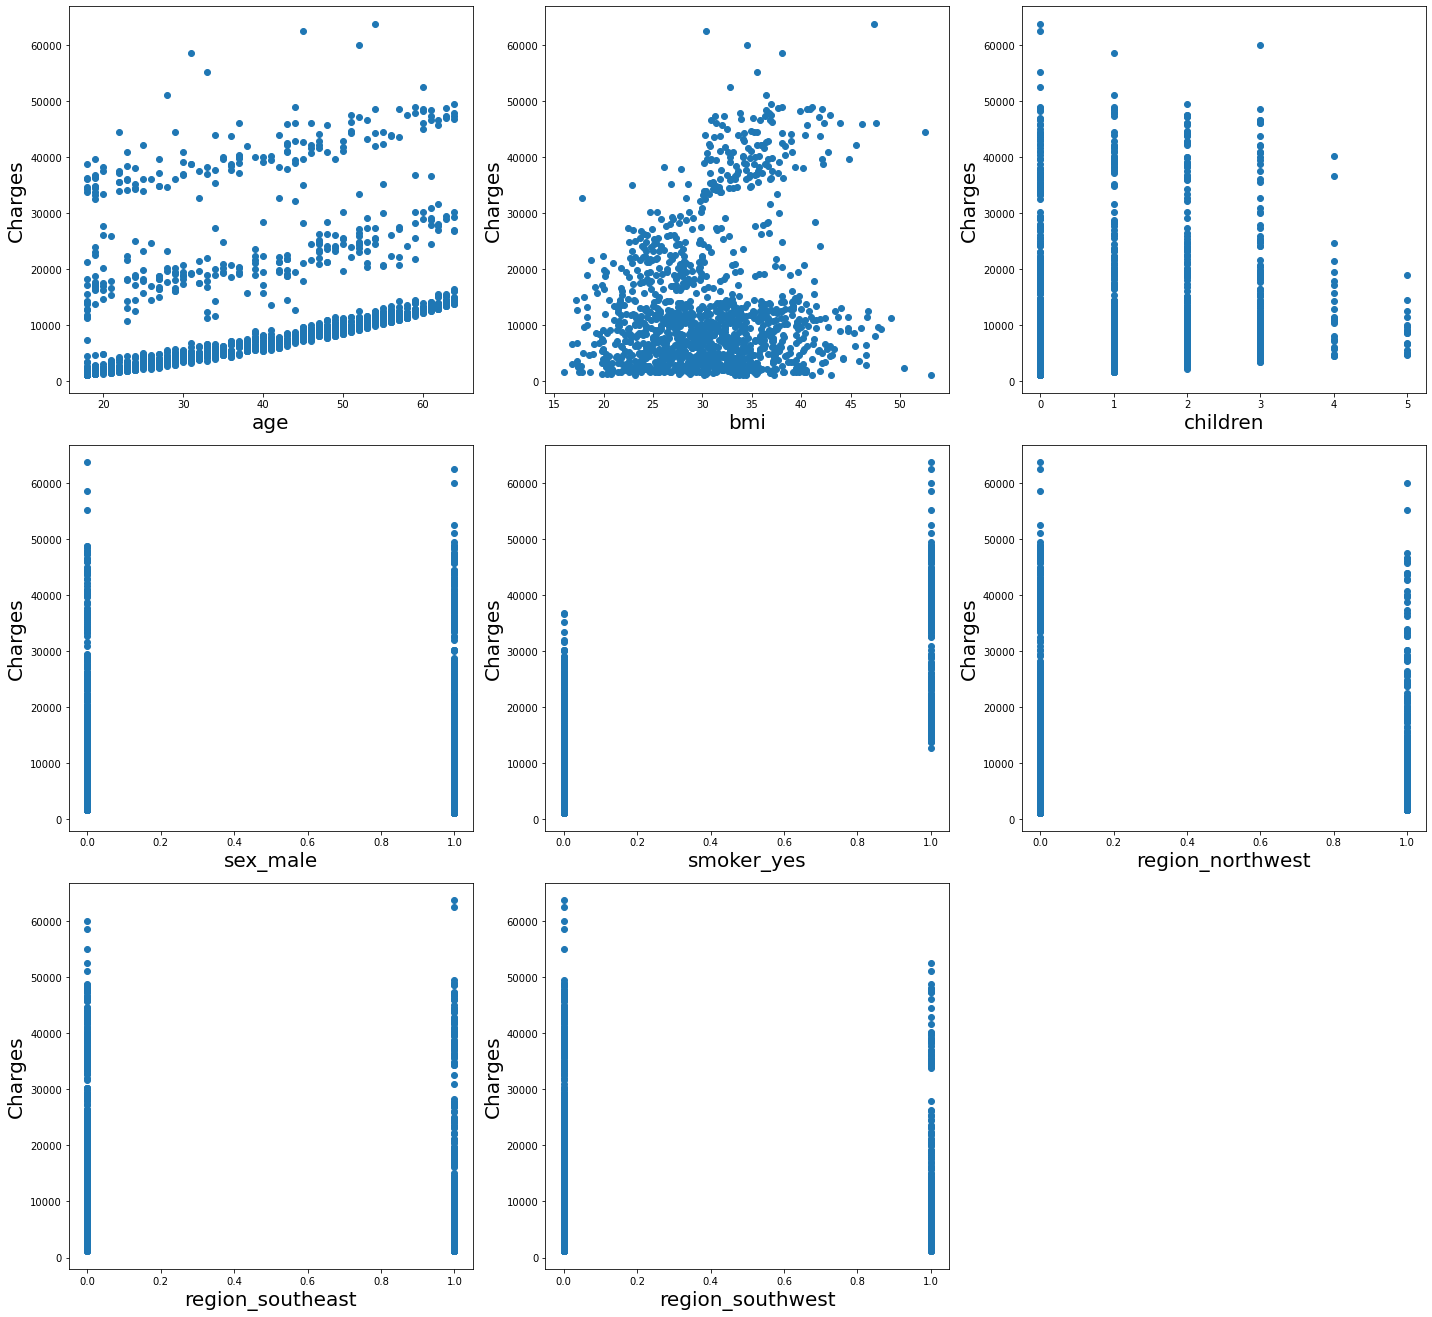

In [40]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Charges',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

check for multicollinearity

In [41]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [42]:
X_scaled

array([[-1.44041773, -0.45315959, -0.90923416, ..., -0.5655458 ,
        -0.61163774,  1.76460935],
       [-1.51164747,  0.50942165, -0.07944162, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       [-0.79935006,  0.3831546 ,  1.58014347, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       ...,
       [-1.51164747,  1.01448983, -0.90923416, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       [-1.29795825, -0.79752426, -0.90923416, ..., -0.5655458 ,
        -0.61163774,  1.76460935],
       [ 1.55123139, -0.26129928, -0.90923416, ...,  1.76820338,
        -0.61163774, -0.56669767]])

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [44]:
vif

,VIF,Features
0,1.016794,age
1,1.106742,bmi
2,1.004017,children
3,1.008944,sex_male
4,1.012100,smoker_yes
5,1.517673,region_northwest
6,1.651779,region_southeast
7,1.529044,region_southwest


We have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

In [45]:
# linear regression
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)


In [46]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [47]:
regression.score(x_train,y_train)

0.7596067020878995

In [48]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [49]:
adj_r2(x_train,y_train)

0.7576699987814576

In [50]:
adj_r2(x_test,y_test)

0.7132148335582891

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [51]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [52]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.43492799493059836

In [53]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.43492799493059836)

In [54]:
lasso_reg.score(x_test, y_test)

0.7200891711904632

In [55]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.55042817, 2.31809588, 1.56201521, 4.88769539, 3.79965535,
       2.34304387, 8.6953229 , 4.19910257, 4.72897172, 4.59550595,
       7.61417825, 2.60408899, 9.14160623, 3.28522936, 7.23885052,
       0.3029682 , 3.52604339, 4.21508276, 9.76161367, 3.37170056,
       4.83960655, 5.85736076, 3.04836238, 9.60347843, 9.96314788,
       0.15293643, 6.12952326, 3.80254548, 2.26659262, 2.26142083,
       4.28694199, 4.25568296, 1.69828758, 5.07096152, 3.80104507,
       2.31180767, 4.73018654, 8.15534167, 6.88893574, 0.30462738,
       3.25890803, 3.78650938, 4.84573548, 1.93385147, 4.78614442,
       6.87344689, 1.11159579, 5.18064012, 1.87610533, 4.46931265]),
        cv=10, normalize=True)

In [56]:
ridgecv.alpha_

0.15293643122122336

In [57]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.15293643122122336)

In [58]:
ridge_model.score(x_test, y_test)

0.7200817190520734

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [59]:
# Random Forest Regressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)
y_predict_rf = regressor_rf.predict(x_test)

In [60]:
rf_r2_score = r2_score(y_test, y_predict_rf)
print('R square Score = ', round(rf_r2_score, 3))

rf_mse = mean_squared_error(y_test, y_predict_rf)
rf_rmse = np.sqrt(rf_mse)
print('Root Mean Squared Error = ', round(rf_rmse, 3))

R square Score =  0.813
Root Mean Squared Error =  5074.861


<AxesSubplot:xlabel='charges'>

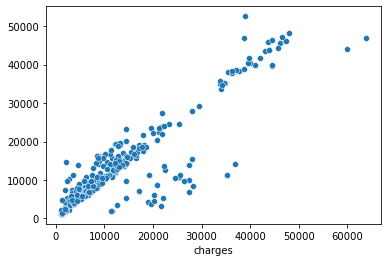

In [61]:
sns.scatterplot(y_test,y_predict_rf)

In [62]:
# GradientBoostingRegressor
gb_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.1)
gb_model.fit(x_train, y_train)

y_predict_gb = gb_model.predict(x_test)

In [63]:
y_predict_gb = gb_model.predict([X_scaled[0]])

In [64]:
y_predict_gb

array([18763.71798931])

In [79]:
# Create a Pickle file  
import pickle
pickle_out = open("insurance.pkl","wb")
pickle.dump(gb_model, pickle_out)